# Supervised learning regression

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [2]:
pd.read_csv('datasets/train_V2_cleaned.csv')

## Train and test split

shuffling the data

In [3]:
from random import Random
df_shuffle = df.sample(frac=1)

Train/test split

In [4]:
from sklearn.model_selection import train_test_split

X = df_shuffle.drop(['outcome_profit'],1)
y = df_shuffle['outcome_profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Linear regression

training

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

evaluating

In [6]:
predictions_train = reg.predict(X_train)
predictions_test = reg.predict(X_test)

In [7]:
from sklearn.metrics import r2_score
print(r2_score(y_train, predictions_train))
print(r2_score(y_test, predictions_test))

0.5289369285447537
0.513930854979215


# Polynomial regression

Designing the features

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_poly.shape

(4000, 3321)

In [9]:
reg_quad = LinearRegression(fit_intercept=False)
reg_quad.fit(X_train_poly, y_train)

LinearRegression(fit_intercept=False)

In [10]:
print(reg_quad.score(X_train_poly, y_train))
print(reg_quad.score(X_test_poly, y_test))

0.7313149792705701
-1.5200774039700615e+19


# Higher order polynomials

cross validation

In [14]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

avg_scores = [None] * 5

for i in np.arange(1,4):
    
    reg_poly = Pipeline([('poly', PolynomialFeatures(degree=i)),
                  ('linear', LinearRegression(fit_intercept=False))])
    
    scores = cross_val_score(reg_poly, X_train, y_train, scoring = 'r2', cv=5)
    
    avg_scores[i-1] = scores.mean()
    
    print("Order "+str(i)+": avg R^2 = "+str( avg_scores[i-1]))

Order 1: avg R^2 = -4.2303901278605814e+18
Order 2: avg R^2 = -1.8004055278294342e+20
Order 3: avg R^2 = -1.4163789478929977e+19


c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "c:\users\jelle\

Order 4: avg R^2 = nan


c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "c:\users\jelle\

Order 5: avg R^2 = nan


c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\users\jelle\appdata\local\programs\python\python39\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "c:\users\jelle\

plotting the results

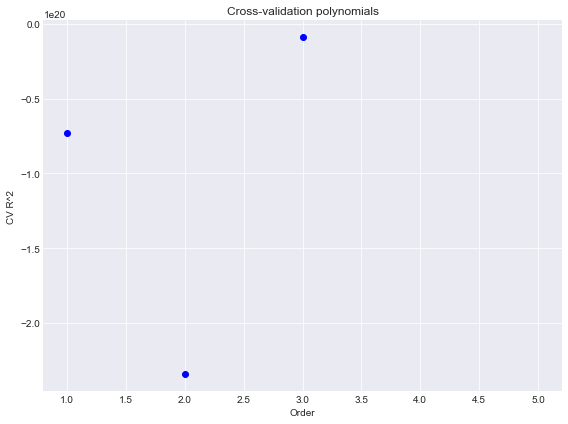

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(np.arange(1,6), avg_scores, c='b', label='data')
plt.axis('tight')
plt.title("Cross-validation polynomials")
ax.set_xlabel("Order");
ax.set_ylabel("CV R^2");
plt.tight_layout()
plt.show()

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.
